In [1]:
# Import packages

# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
cln = ['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'barium', 'iron', 'type_of_glass']

df = pd.read_csv('glass.csv', names=cln, engine='pyarrow')
df.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

✅ No missing values for df:
refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64


In [4]:
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  214 non-null    float64
 1   sodium            214 non-null    float64
 2   magnesium         214 non-null    float64
 3   aluminum          214 non-null    float64
 4   silicon           214 non-null    float64
 5   potassium         214 non-null    float64
 6   calcium           214 non-null    float64
 7   barium            214 non-null    float64
 8   iron              214 non-null    float64
 9   type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
📊 DataFrame Info: None


In [5]:
# Value_counts - Unique
objects = df.select_dtypes(include=['int'])
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].unique()) 

[1 2 3 5 6 7]


type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


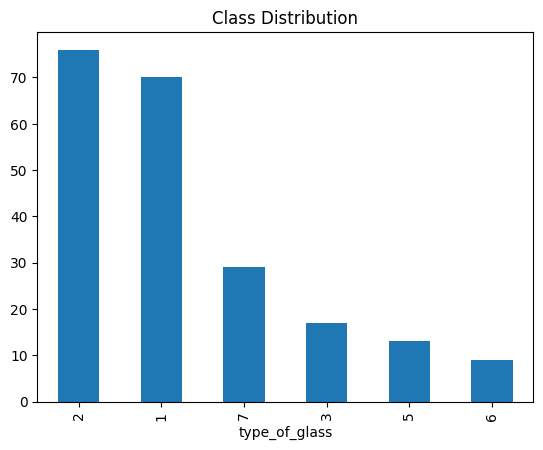

In [6]:
# Visualize imbalance
print(df['type_of_glass'].value_counts())
df['type_of_glass'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [7]:
import pandas as pd
from sklearn.utils import resample
from collections import Counter

# Method 1: Oversample all minority classes to match the majority class
def oversample_to_majority(df, target_column):
    """
    Oversample all minority classes to match the size of the majority class
    """
    # Find the majority class (most frequent)
    class_counts = df['type_of_glass'].value_counts()
    majority_class = class_counts.index[0]
    majority_count = class_counts.iloc[0]
    
    print(f"Original class distribution:")
    print(class_counts)
    print(f"\nMajority class: {majority_class} with {majority_count} samples")
    
    # Separate classes
    dfs_by_class = {}
    for class_value in df['type_of_glass'].unique():
        dfs_by_class[class_value] = df[df['type_of_glass'] == class_value]
    
    # Oversample minority classes
    oversampled_dfs = []
    for class_value, class_df in dfs_by_class.items():
        if len(class_df) < majority_count:
            # Oversample this minority class
            oversampled = resample(class_df,
                                 replace=True,
                                 n_samples=majority_count,
                                 random_state=42)
            oversampled_dfs.append(oversampled)
            print(f"Oversampled class {class_value}: {len(class_df)} -> {len(oversampled)}")
        else:
            # Keep majority class as is
            oversampled_dfs.append(class_df)
            print(f"Kept class {class_value}: {len(class_df)} samples")
    
    # Combine all classes
    balanced_df = pd.concat(oversampled_dfs, ignore_index=True)
    
    print(f"\nFinal class distribution:")
    print(balanced_df['type_of_glass'].value_counts())
    
    return balanced_df

# Example usage:
if __name__ == "__main__":
# Assuming you have a dataframe 'df' with target column 'type_of_glass'
    
    # Method 1: Balance to majority class
    balanced_df = oversample_to_majority(df, 'type_of_glass')   

Original class distribution:
type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Majority class: 2 with 76 samples
Oversampled class 1: 70 -> 76
Kept class 2: 76 samples
Oversampled class 3: 17 -> 76
Oversampled class 5: 13 -> 76
Oversampled class 6: 9 -> 76
Oversampled class 7: 29 -> 76

Final class distribution:
type_of_glass
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [9]:
balanced_df.to_csv('glass_balanced.csv', index=False)

In [10]:
df = balanced_df

Dataset shape: (456, 9)
Feature names: Index(['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron'], dtype='object')
Number of classes: 6
Class distribution: [ 0 76 76 76  0 76 76 76]

X Train shape: (364, 9)
Y Train shape: (364,)
X Test shape: (92, 9)
Y Test shape: (92,)
-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance ---
Accuracy test set: 0.5978
Accuracy train set: 0.7170

Classification Report:
Classification Report test set:
               precision    recall  f1-score   support

           1       0.50      0.15      0.23        20
           2       0.19      0.20      0.19        15
           3       0.29      0.43      0.34        14
           5       0.75      1.00      0.86        12
           6       0.92      1.00      0.96        11
           7       0.95      1.00      0.98        20

    accuracy           

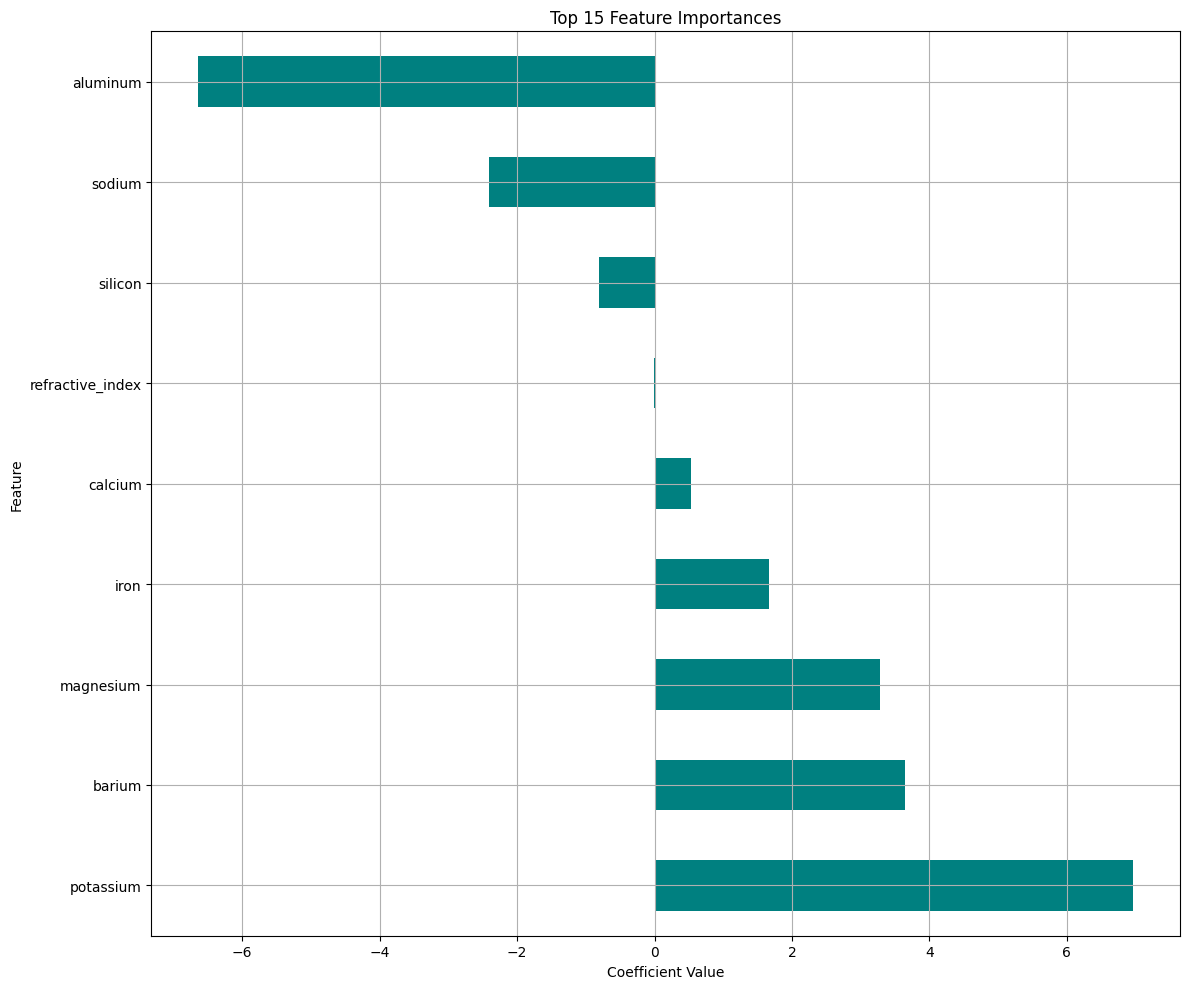

--- Top 10 Most Important Features ---
                  Coefficient
potassium            6.965851
barium               3.648603
magnesium            3.274337
iron                 1.660692
calcium              0.537653
refractive_index    -0.012335
silicon             -0.806829
sodium              -2.411660
aluminum            -6.639931
--- Bottom 10 Least Important Features ---
                  Coefficient
potassium            6.965851
barium               3.648603
magnesium            3.274337
iron                 1.660692
calcium              0.537653
refractive_index    -0.012335
silicon             -0.806829
sodium              -2.411660
aluminum            -6.639931
-------------------------------------------------------------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/pyth

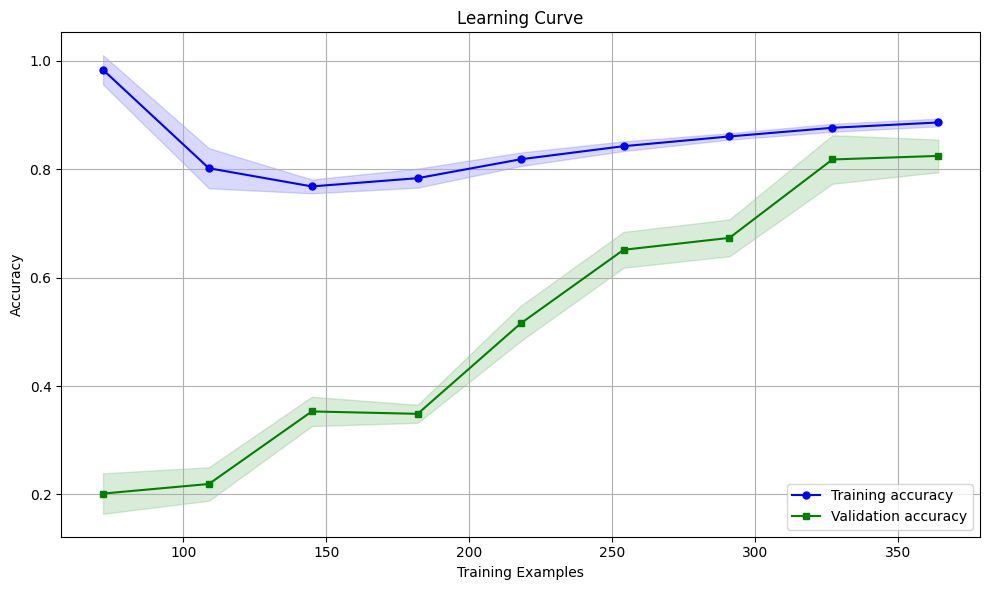

In [12]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['type_of_glass'], axis=1)
y = df['type_of_glass']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],             # Regularization type
    'classifier__solver': ['liblinear', 'saga'],     # Algorithm to use
    'classifier__max_iter': [10000, 50000, 100000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']   # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))
print("-" * 127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Basic Model Accuracy Pipeline: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
cv_scores_basic_pipe = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_lr}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_pipe}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_grid}\n")

print(f"Basic Model Average CV Score LR:     {cv_scores_basic_lr.mean():.4f} ± {cv_scores_basic_lr.std():.4f}")
print(f"Basic Model Average CV Score Pipe:  {cv_scores_basic_pipe.mean():.4f} ± {cv_scores_basic_pipe.std():.4f}")
print(f"Tuned Model Average CV Score Grid:  {cv_scores_tuned_grid.mean():.4f} ± {cv_scores_tuned_grid.std():.4f}")
print("-" * 127)  

"""
# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()
"""

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

## RandomForestClassifier

Dataset shape: (456, 9)
Feature names: Index(['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon', 'potassium', 'calcium', 'barium', 'iron'], dtype='object')
Number of classes: 6
Class distribution: [ 0 76 76 76  0 76 76 76]

X Train shape: (364, 9)
Y Train shape: (364,)
X Test shape: (92, 9)
Y Test shape: (92,)
-------------------------------------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test set: 0.9565
Accuracy Train set: 1.0000

Classification Report:
Classification Report Test: 
               precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.93      0.87      0.90        15
           3       0.82      1.00      0.90        14
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        11
           7       1.00      0.95      0.97        20

    accuracy       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9396
-------------------------------------------------------------------------------------------------------------------------------
--- Randomized Search Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best cross-validation score: 0.9369
-------------------------------------------------------------------------------------------------------------------------------
--- Best Grid Search Model Evaluation ---
Accuracy Test: 0.9457
Accuracy Train: 1.0000

Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        20
           2       0.92      0.80      0.86        15
           3       0.82     

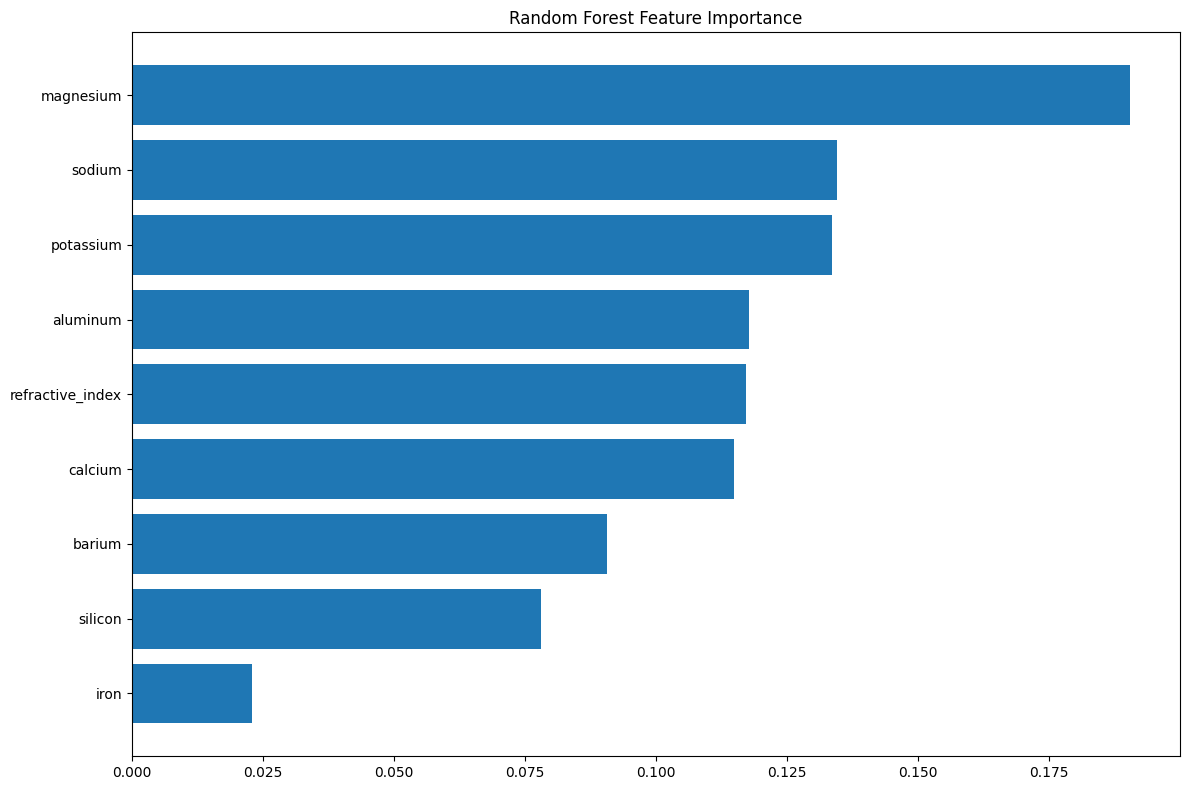

Cross-validation scores: [0.90410959 0.93150685 0.93150685 0.97260274 0.95833333]
Mean CV accuracy: 0.9396
Standard deviation: 0.0238
-------------------------------------------------------------------------------------------------------------------------------


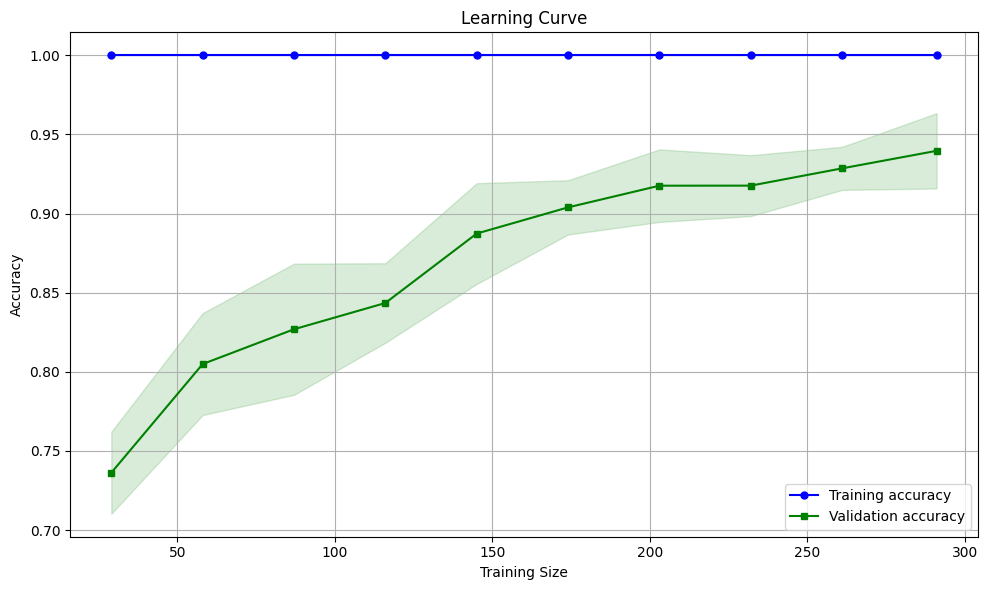

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 170
Fine-tuned accuracy: 0.9424
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 170}
Accuracy Test: 0.9565
Accuracy Train: 1.0000

Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.93      0.87      0.90        15
           3       0.82      1.00      0.90        14
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        11
           7       1.00      0.95      0.97        20

    accuracy                           0.96        92
   macro avg       0.96      0.96      0.96        92
weighted avg

In [14]:
# RandomForest Tuning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.datasets import load_breast_cancer

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['type_of_glass'], axis=1)
y = df['type_of_glass']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = ['1','2','3','5','6','7']

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train set: {accuracy_score(y_train, y_pred_base_train):.4f}\n")
print("Classification Report:")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_base, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_base_train, target_names=target_names))
print('-' *127)

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_grid_train):.4f}\n")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_grid, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_grid_train, target_names=target_names))
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

"""
# 7. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()

# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()
""" 

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127)

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_final_train):.4f}\n")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_final, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_final_train, target_names=target_names))
print('-' *127)

In [15]:
# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Basic Model Accuracy Pipeline Grid: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_final):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_rf = cross_val_score(rf_base, X, y, cv=5, scoring='accuracy')
cv_scores_basic_rf_grid = cross_val_score(best_grid_model, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_rf_grid = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_rf}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_rf_grid}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_rf_grid}\n")

print(f"Basic Model Average CV Score RF:      {cv_scores_basic_rf.mean():.4f} ± {cv_scores_basic_rf.std():.4f}")
print(f"Basic Model Average CV Score Pipe RF: {cv_scores_basic_rf_grid.mean():.4f} ± {cv_scores_basic_rf_grid.std():.4f}")
print(f"Tuned Model Average CV Score Grid RF: {cv_scores_tuned_rf_grid.mean():.4f} ± {cv_scores_tuned_rf_grid.std():.4f}")
print("-" * 127) 

--- Model Comparison ---
Basic Model Accuracy: 0.9565
Basic Model Accuracy Pipeline Grid: 0.9457
Tuned Model Accuracy GridSearch: 0.9565

Basic Model Logistic Regression Cross-Validation Scores: [0.95652174 0.92307692 0.86813187 0.9010989  0.95604396]
Basic Model Pipeline Cross-Validation Scores: [0.9673913  0.92307692 0.87912088 0.91208791 0.94505495]
Tuned Model Grid Search Cross-Validation Scores: [0.9673913  0.93406593 0.87912088 0.91208791 0.94505495]

Basic Model Average CV Score RF:      0.9210 ± 0.0337
Basic Model Average CV Score Pipe RF: 0.9253 ± 0.0299
Tuned Model Average CV Score Grid RF: 0.9275 ± 0.0301
-------------------------------------------------------------------------------------------------------------------------------


In [11]:
df

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1
1,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1
2,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1
3,1.51750,12.82,3.55,1.49,72.75,0.54,8.52,0.00,0.19,1
4,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
451,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
452,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
453,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7
454,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7
